# Обогащение g4 возле петель

## 0. Преобразование файла с g4 в bed

In [19]:
chr_pattern = '>chr'
chr_name = ''
table_pattern = 'Score' #'NBR'
g4_filename = '../data/G4/Results_score1.7/dicty-25-nts'
with open(g4_filename) as inp, open('../data/G4/Results_score1.7/g4.bed', 'w') as out:
    for line in inp:
        line = line.replace('\n', '')   
        if (line.startswith(chr_pattern)):
            chr_name = line[4:]
            continue
        if (line.endswith(table_pattern)):
            continue
        row = line.split(' \t ')
        start, end, seq, length, score = row[0], row[1], row[2], row[3], row[4]
        str_row = chr_name + '\t' + start + '\t' + end + '\t' + seq + '\t' + length + '\t' + score + '\n'
        out.write(str_row)

In [20]:
!bedtools merge -i '../data/G4/Results_score1.7/g4.bed' -c 6 -o absmax > '../data/G4/Results_score1.7/g4_merged.bed'

## 1. Читаем из файла

In [2]:
import pandas as pd
import glob
import numpy as np

In [23]:
loops_info = pd.read_excel('../data/dicty_loop_positions_Chr1_Chr6.xlsx')

In [5]:
window = 2000
loops_info.head()

,Chr,ID,"Genomic bin, Left base","Genomic bin, Right base",Size (Kb),"""Extrusion track""","Note for extrusion tracks: 0=n/a, 1=from the left base, 2=from the right base"
0,1,1,107,114,16,0,NaN
1,1,2,114,123,20,1,NaN
2,1,3,176,187,24,2,NaN
3,1,4,187,194,16,0,NaN
4,1,5,194,209,32,2,NaN


In [6]:
chr_pattern = 'chr'
chr_with_loops = sorted(loops_info.Chr.unique())
chr_with_loops = [str(chr) for chr in chr_with_loops]
chr_with_loops

['1', '6']

### Новые данные по петлям

In [173]:
l = pd.read_csv('../data/loops/chr1.csv')
l.head()

,x (geom),y (geom),radius,x (center),y (center),thresh (respect),thresh (absolute),Mapped,cross15,fdr
0,186.0,175.0,1.361181,186.0,175.0,2.067090,134.604720,True,False,0.021461
1,208.0,200.0,1.255115,208.0,200.0,1.250453,88.551123,True,False,0.213487
2,208.0,193.0,1.414214,208.0,193.0,2.725542,86.767234,True,False,0.299402
3,292.0,281.0,1.414214,292.0,281.0,1.938728,144.538896,True,False,0.021461
4,313.0,305.0,1.414214,313.0,305.0,1.378994,111.335181,True,False,0.213487


In [174]:
l[l['cross15'] == True].shape

(0, 10)

In [3]:
dr = '../data/loops/'
loops_info = pd.DataFrame(columns=['Chr', 'Genomic bin, Left base', 'Genomic bin, Right base', 'Mapped', 'cross15'])
chr_with_loops = range(1,7)
for i in chr_with_loops:
    filename = dr + 'chr' + str(i) + '.csv'
    l = pd.read_csv(filename)
    l = l[l['cross15'] == False]
    for _,row in l.iterrows():
        loops_info = loops_info.append({'Chr': i, 'Genomic bin, Left base': row['y (geom)'], 
                          'Genomic bin, Right base': row['x (geom)'], 'Mapped': row['Mapped'],
                          'cross15': row['cross15']}, ignore_index=True)

In [5]:
loops_info.head()

,Chr,"Genomic bin, Left base","Genomic bin, Right base",Mapped,cross15
0,1,175.0,186.0,True,False
1,1,200.0,208.0,True,False
2,1,193.0,208.0,True,False
3,1,281.0,292.0,True,False
4,1,305.0,313.0,True,False


### G4

In [6]:
chr_g4pos = {}
genome_occurs = 0
with open('../data/G4/Results_score1.7/g4_merged.bed') as inp:
    for line in inp:
        line = line.replace('\n', '')
        l = line.split('\t')
        #if (l[0] in chr_with_loops):
        chr_name = l[0]
        chr_g4pos[chr_name] = chr_g4pos.get(chr_name, {})
        chr_g4pos[chr_name][int(l[1])] = int(l[2])
        genome_occurs = genome_occurs + 1

In [7]:
genome_occurs

517

In [184]:
chr_g4pos

{'chr1': {255044: 255080,
  354918: 354965,
  479135: 479171,
  558349: 558384,
  576212: 576246,
  625745: 625784,
  914643: 914678,
  997648: 997684,
  1040100: 1040144,
  1040145: 1040212,
  1055830: 1055869,
  1171754: 1171789,
  1279152: 1279181,
  1573736: 1573762,
  1591277: 1591316,
  1650667: 1650702,
  1692565: 1692625,
  1717479: 1717505,
  1730667: 1730696,
  1755849: 1755883,
  1996423: 1996448,
  2009371: 2009396,
  2037669: 2037697,
  2144765: 2144803,
  2316902: 2316929,
  2323425: 2323455,
  2352184: 2352223,
  2445620: 2445658,
  2490732: 2490769,
  2553774: 2553803,
  2630758: 2630789,
  2748583: 2748629,
  2802980: 2803020,
  2824739: 2824777,
  2846394: 2846422,
  2943708: 2943753,
  3095856: 3095896,
  3171281: 3171308,
  3179564: 3179605,
  3179620: 3179645,
  3213805: 3213850,
  3214270: 3214296,
  3295637: 3295671,
  3297991: 3298016,
  3335572: 3335597,
  3379646: 3379673,
  3410358: 3410390,
  3667119: 3667147,
  3735188: 3735217,
  3913515: 3913545,
  399527

In [79]:
mean = 0
for ch, d in chr_g4pos.iteritems():
    mean = mean + len(d)
mean = mean * 1.0 / len(chr_g4pos)

In [80]:
mean

86.16666666666667

In [82]:
l_info = loops_info[loops_info['Chr'].isin(chr_with_loops)] 

In [83]:
print loops_info.shape, l_info.shape

(479, 5) (479, 5)


In [9]:
window = 2000
df_g4 = pd.DataFrame(columns=['chr', 'g4_left', 'g4_right', 'left_loop_cnt', 'right_loop_cnt', 'inner_loop_cnt'])
for chr_name,d in sorted(chr_g4pos.iteritems()):
    chr_name = int(chr_name[3:])
    l_info = loops_info[loops_info['Chr'] == chr_name] # фильтруем только петли для данной хромосомы
    for start,end in sorted(d.iteritems()):
        left_cnt = 0
        right_cnt = 0
        inner_cnt = 0
        for _,row in l_info.iterrows():
            left = row['Genomic bin, Left base'] * window
            right = row['Genomic bin, Right base'] * window
            if end < left - window:
                break
                
            if ((start >= left-window) and (start <= left+window)) \
            or ((end >= left-window) and (end <= left+window)):
                left_cnt = left_cnt + 1
            elif ((start >= right-window) and (start <= right+window)) \
            or ((end >= right-window) and (end <= right+window)):
                right_cnt = right_cnt + 1
            elif ((start > left+window) and (start < right-window)) \
            or ((end > left+window) and (end < right-window)):
                inner_cnt = inner_cnt + 1
        df_g4 = df_g4.append({'chr': 'chr' + str(chr_name), \
                              'g4_left': start//window, \
                              'g4_right': end//window, \
                              'left_loop_cnt': left_cnt, \
                              'right_loop_cnt': right_cnt, \
                              'inner_loop_cnt': inner_cnt}, ignore_index = True)

In [26]:
with open('../data/G4/Results_score1.7/g4_stat.csv', 'w') as out:
    heading = 'chr;g4_left;g4_right;left_loop_cnt;right_loop_cnt;inner_loop_cnt\n'
    out.write(heading)
    for _,row in df_g4.iterrows():
        out.write('%s;%i;%i;%i;%i;%i\n' % (row['chr'], row['g4_left'], row['g4_right'], \
                                          row['left_loop_cnt'], row['right_loop_cnt'], \
                                          row['inner_loop_cnt']))

In [11]:
g4_st = df_g4[(df_g4['left_loop_cnt'] != 0) | (df_g4['right_loop_cnt'] != 0)]
print len(g4_st)
g4_st

21


,chr,g4_left,g4_right,left_loop_cnt,right_loop_cnt,inner_loop_cnt
5,chr1,312,312,0,1,0
50,chr1,1997,1997,0,2,0
72,chr2,638,639,0,1,0
89,chr2,1046,1046,1,0,0
220,chr3,2328,2328,0,1,0
227,chr3,2496,2496,1,0,0
238,chr3,2907,2907,0,1,0
250,chr4,40,40,1,0,0
284,chr4,786,786,1,0,1
286,chr4,950,950,0,1,0


In [211]:
df_g4[(df_g4['inner_loop_cnt'] != 0)]

,chr,g4_left,g4_right,left_loop_cnt,right_loop_cnt,inner_loop_cnt
1,chr1,177,177,0,0,1
4,chr1,288,288,0,0,1
11,chr1,585,585,0,0,1
23,chr1,1072,1072,0,0,1
31,chr1,1374,1374,0,0,1
32,chr1,1401,1401,0,0,1
49,chr1,1956,1956,0,0,1
51,chr1,2011,2011,0,0,1
63,chr2,321,321,0,0,1
72,chr2,638,639,0,0,1


### DataFrame с распределением хитов на килобазу по всему геному и возле позиций петель

In [95]:
chr_sizes = {'chr1': 4923596, 'chr2': 8484197, 'chr3': 6357299, 'chr4': 5450249, 'chr5': 5125352, 'chr6': 3602379}

In [99]:
genome_size = chr_sizes['chr1'] + chr_sizes['chr2'] + chr_sizes['chr3'] + chr_sizes['chr4'] + chr_sizes['chr5'] + chr_sizes['chr6']
genome_size

33943072

In [106]:
chr_with_loops

[1, 2, 3, 4, 5, 6]

In [114]:
# Изменить названия хромосом в g4_merged на chr + i
!bedtools coverage -a ../data/G4/Results_score1.7/windows.bed -b ../data/G4/Results_score1.7/g4_merged.bed > ../data/G4/Results_score1.7/g4_merged_cov.bed

In [13]:
g4_loop_df = df_g4[(df_g4['left_loop_cnt'] != 0) | (df_g4['right_loop_cnt'] != 0)] #| (df_g4['inner_loop_cnt'] != 0)]
g4_loop_df

,chr,g4_left,g4_right,left_loop_cnt,right_loop_cnt,inner_loop_cnt
5,chr1,312,312,0,1,0
50,chr1,1997,1997,0,2,0
72,chr2,638,639,0,1,0
89,chr2,1046,1046,1,0,0
220,chr3,2328,2328,0,1,0
227,chr3,2496,2496,1,0,0
238,chr3,2907,2907,0,1,0
250,chr4,40,40,1,0,0
284,chr4,786,786,1,0,1
286,chr4,950,950,0,1,0


In [16]:
# Запись позиций g4 возле петель в файл для покрытия
with open('../data/G4/Results_score1.7/g4_loops.bed', 'w') as out:
    for _,row in g4_loop_df.iterrows():
        chr_name = row['chr']
        #pos = row[1].split('_')
        left = row['g4_left'] #pos[0]
        right = row['g4_right'] #pos[1]
        s = chr_name + '\t' + str(left) + '\t' + str(right) + '\n'
        out.write(s)

In [17]:
# Распределение по g4 возле петель
!bedtools coverage -a ../data/G4/Results_score1.7/windows.bed -b ../data/G4/Results_score1.7/g4_loops.bed > ../data/G4/Results_score1.7/g4_loops_cov.bed

In [18]:
# Процент петель, связанных с g4:
loops_perc = g4_loop_df.shape[0] * 100.0 / loops_info.shape[0] 
print str(loops_perc) + '%'
# Процент g4, связанных с петлями:
g4_perc = g4_loop_df.shape[0] * 100.0 / df_g4.shape[0]
print str(g4_perc) + '%'

6.40243902439%
4.06189555126%


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
# читаем распределения из файлов
background_distr = []
loops_distr = []
dr = '../data/G4/Results_score1.7/'
with open(dr + 'g4_merged_cov.bed') as inp:
    lines = inp.readlines()
    for line in lines:
        line = line.replace('\n', '')
        row = line.split('\t')
        background_distr.append(int(row[3]))
        
with open(dr + 'g4_loops_cov.bed') as inp:
    lines = inp.readlines()
    for line in lines:
        line = line.replace('\n', '')
        row = line.split('\t')
        loops_distr.append(int(row[3]))

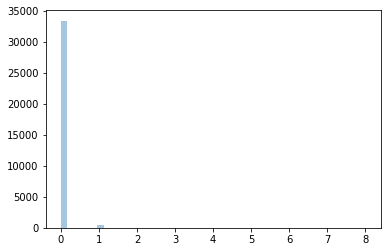

In [22]:
sns.distplot(background_distr, kde=False)
plt.show()

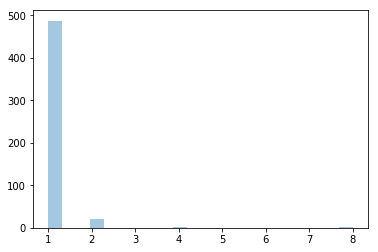

In [23]:
sns.distplot(filter(lambda a: a != 0, background_distr), kde=False)
plt.show()

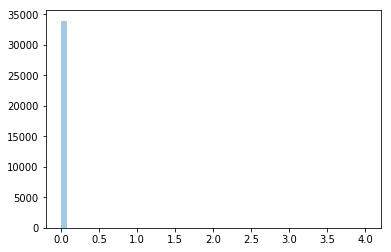

In [24]:
sns.distplot(loops_distr, kde=False)
plt.show()

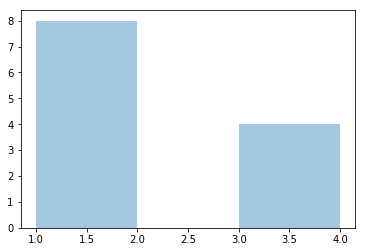

In [45]:
sns.distplot(filter(lambda a: a != 0, loops_distr), kde=False, bins=[1,2,3,4])
plt.show()

### Частота встречаемости на килобазу

In [152]:
kilobase_cnt = genome_size // 1000
kilobase_cnt

33943

In [27]:
np.mean(background_distr)

0.01587769169587887

In [28]:
np.mean(loops_distr)

0.0006186113647745014

## Сравним outer inner

In [160]:
# Запись позиций g4 внутри петель в файл для покрытия
g4_in_loop_df = g4_loop_df[g4_loop_df['inner_loop_cnt'] != 0]
with open('../data/G4/Results_score1.7/g4_in_loops.bed', 'w') as out:
    for _,row in g4_in_loop_df.iterrows():
        chr_name = row[0]
        pos = row[1].split('_')
        left = pos[0]
        right = pos[1]
        s = chr_name + '\t' + left + '\t' + right + '\n'
        out.write(s)
        
# Запись позиций g4 вне петель в файл для покрытия
g4_out_loop_df = df_g4[(df_g4['left_loop_cnt'] == 0) & (df_g4['right_loop_cnt'] == 0) & (df_g4['inner_loop_cnt'] == 0)]
with open('../data/G4/Results_score1.7/g4_out_loops.bed', 'w') as out:
    for _,row in g4_out_loop_df.iterrows():
        chr_name = row[0]
        pos = row[1].split('_')
        left = pos[0]
        right = pos[1]
        s = chr_name + '\t' + left + '\t' + right + '\n'
        out.write(s)

In [161]:
# Распределение по g4 внутри петель
!bedtools coverage -a ../data/G4/Results_score1.7/windows.bed -b ../data/G4/Results_score1.7/g4_in_loops.bed > ../data/G4/Results_score1.7/g4_in_loops_cov.bed

# Распределение по g4 вне петель
!bedtools coverage -a ../data/G4/Results_score1.7/windows.bed -b ../data/G4/Results_score1.7/g4_out_loops.bed > ../data/G4/Results_score1.7/g4_out_loops_cov.bed


In [162]:
# читаем распределения из файлов
inner_distr = []
outer_distr = []
dr = '../data/G4/Results_score1.7/'
with open(dr + 'g4_in_loops_cov.bed') as inp:
    lines = inp.readlines()
    for line in lines:
        line = line.replace('\n', '')
        row = line.split('\t')
        inner_distr.append(int(row[3]))
        
with open(dr + 'g4_out_loops_cov.bed') as inp:
    lines = inp.readlines()
    for line in lines:
        line = line.replace('\n', '')
        row = line.split('\t')
        outer_distr.append(int(row[3]))

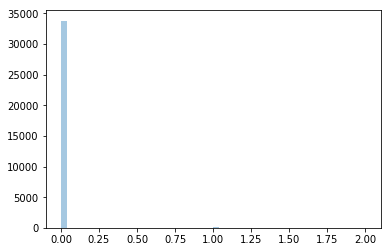

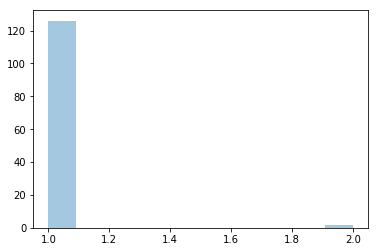

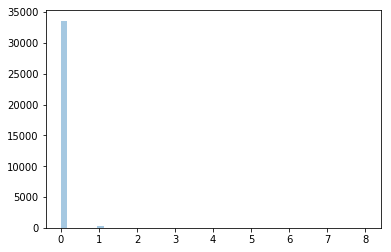

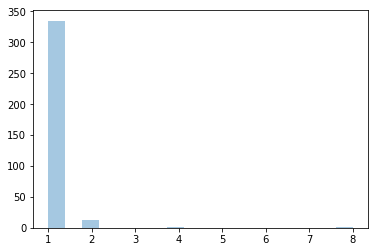

In [217]:
sns.distplot(inner_distr, kde=False)
plt.show()

sns.distplot(filter(lambda a: a != 0, inner_distr), kde=False)
plt.show()

sns.distplot(outer_distr, kde=False)
plt.show()

sns.distplot(filter(lambda a: a != 0, outer_distr), kde=False)
plt.show()

In [218]:
np.mean(filter(lambda a: a != 0, inner_distr)), np.mean(filter(lambda a: a != 0, outer_distr))

(1.015625, 1.0630372492836677)

In [171]:
print np.mean(inner_distr), np.mean(outer_distr)

0.003829498924794533 0.010928800777682858
